# **Analiza ekonomskega stanja slovenskih občin in regij**
#### *Projektna naloga iz analize podatkov pri predmetu Programiranje 1*

> V svoji analizi podatkov predstavljam določene aspekte ekonomskega stanja v 210 slovenskih občinah glede na zbirko podatkov [statističnega urada Republike Slovenije](https://www.stat.si/obcine) za leto 2019. V Sloveniji od leta 2011 obstaja 212 občin - zadnji dve novonastali, Anakaran in Mirna, sta iz te analize izvzeti.
>
> #### **Zajem podatkov**
> Za vsako občino sem zajel naslednje podatke:
> * ime občine
> * regija in upravna enota
> * površina, število prebivalcev in skupni prirast prebivalstva
> * stopnja delovno aktivnega prebivalstva
> * neto plača na prebivalca
> * prihodek podjetij
> * povprečna starost avtomobilov na dan 31. december za to leto
>
> #### **Delovne hipoteze**
> Pred začetkom sem si postavil nekaj hipotez oziroma vprašanj, na katera bom poskusil kar se dosledno odgovoriti in jih kasneje še obrazložiti:
> * Ali obstaja korelacija med povprečno neto plačo in letnim prirastom?
> * Kje se pojavljajo skrajni primeri stopnje delovno aktivnega prebivalstva?
> * Kakšni so prihodki glede na regijo in upravno enoto?
> * Prihodki na osebo in podjetja


### **Delovno okolje**

Analiza in manipulacija podatkov bo izvedena z uporabo knjižnice Pandas, zato je potrebno le-to najprej uvoziti. Za upravljanje in reprezentacijo rezultatov pa bomo uporabljali še nekatera priročna orodja.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Naložimo celotno razpredelnico podatkov, s katerimi bomo razpolagali.

In [56]:
obcine = pd.read_csv('obcine.csv', index_col='id')
obcine

,ime_obcine,regija,UE,povrsina,prebivalci,prirast,delovna_aktivnost,placa,podjetja,starost_avtomobila
id,,,,,,,,,,
1,Ajdovščina,goriška,Ajdovščina,245,19364,8.9,69.1,1055.98,703624000,11.8
2,Apače,pomurska,Gornja Radgona,54,3532,5.1,45.0,978.90,27489000,9.7
3,Beltinci,pomurska,Murska Sobota,62,8098,-5.6,59.0,953.26,103717000,9.9
4,Benedikt,podravska,Lenart,24,2584,14.7,59.0,966.69,27658000,10.3
5,Bistrica ob Sotli,posavska,Šmarje pri Jelšah,31,1333,6.8,63.7,1042.67,10954000,11.5
...,...,...,...,...,...,...,...,...,...,...
206,Železniki,gorenjska,Škofja Loka,164,6699,4.6,71.7,1084.10,289400000,10.4
207,Žetale,podravska,Ptuj,38,1297,12.3,65.6,1029.91,5695000,10.5
208,Žiri,gorenjska,Škofja Loka,49,4915,11.0,74.3,1023.21,276784000,11.3


### **Proučevanje in interpretacija podatkov**

#### **Osnovni podatki**

Poglejmo si porazdelitev prebivalstva Slovenije najprej celovkupno, nato pa se porazdelitev po regijah in upravnih enotah.

In [57]:
obcine[['ime_obcine', 'regija', 'UE', 'povrsina', 'prebivalci']]

,ime_obcine,regija,UE,povrsina,prebivalci
id,,,,,
1,Ajdovščina,goriška,Ajdovščina,245,19364
2,Apače,pomurska,Gornja Radgona,54,3532
3,Beltinci,pomurska,Murska Sobota,62,8098
4,Benedikt,podravska,Lenart,24,2584
5,Bistrica ob Sotli,posavska,Šmarje pri Jelšah,31,1333
...,...,...,...,...,...
206,Železniki,gorenjska,Škofja Loka,164,6699
207,Žetale,podravska,Ptuj,38,1297
208,Žiri,gorenjska,Škofja Loka,49,4915


Tortni diagram

<AxesSubplot:xlabel='regija'>

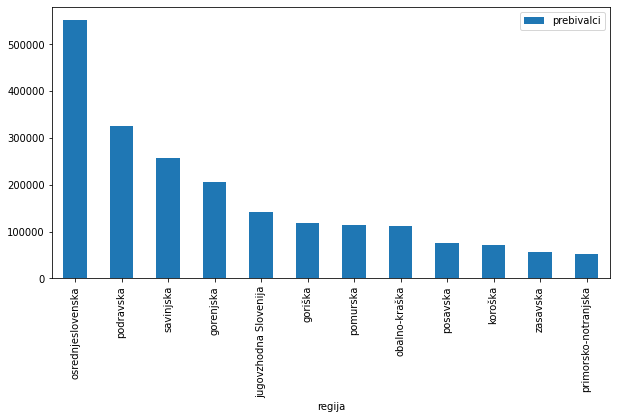

In [208]:
regije = obcine.groupby('regija').sum()[['prebivalci']]
regije.sort_values('prebivalci', ascending=False).plot.bar(figsize=(10, 5))

In [209]:
ue_prebivalci = obcine.groupby('UE').sum()[['prebivalci']].sort_values('prebivalci', ascending=False)
ue_prebivalci

,prebivalci
UE,
Ljubljana,368713
Maribor,149170
Kranj,82917
Ptuj,68938
Novo mesto,66237
Celje,65264
Domžale,59819
Nova Gorica,58453
Murska Sobota,54719


Kot lahko vidimo, je največ prebivalstva skoncentriranega na območju tistih upravnih enot, kjer se načeloma nahajajo mestne občine. Tovrsten naziv po Zakonu o lokalni samoupravi dobijo občine, ki imajo najmanj 15 tisoč delovnih mest, od tega s precejšnjo večino v terciarnem in kvartarnem sektorju dejavnosti, poleg tega pa so tudi pomembna središča širšega območja.
Zaradi tovrstnih dejstev je smisleno analizo kasneje omejiti tudi na najbolj poseljene upravne enote.

In [210]:
velikeUE = ue_prebivalci.nlargest(10, 'prebivalci')
#velikeUE

In [211]:
#regije_place = obcine.groupby('regija').mean()[['place']]
#regije_place

Izračunajmo še število občin, ki pripadajo posamezni statistični regiji.

In [212]:
regijsko = obcine[['ime_obcine', 'regija']]
regije_prestete = regijsko.pivot_table(columns=['regija'], aggfunc='size')
regije_prestete


regija
gorenjska                18
goriška                  13
jugovzhodna Slovenija    20
koroška                  12
obalno-kraška             7
osrednjeslovenska        25
podravska                41
pomurska                 27
posavska                  6
primorsko-notranjska      6
savinjska                31
zasavska                  4
dtype: int64

#### **Delovna aktivnost**

S primernim grafom lahko poskušamo ugotoviti, ali obstaja korelacija med delovno aktivnostjo in plačo v danih občinah v državi.

<AxesSubplot:xlabel='delovna_aktivnost', ylabel='placa'>

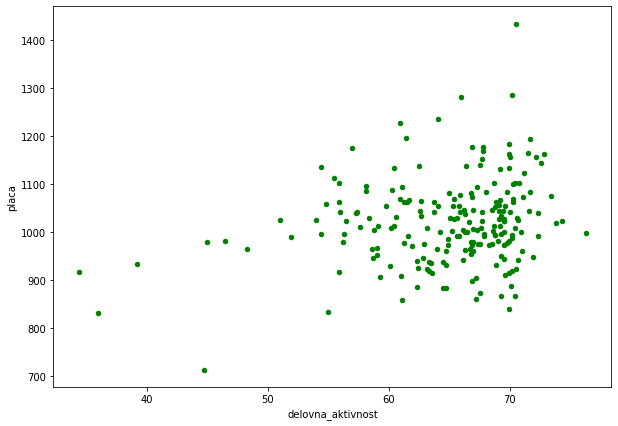

In [213]:
obcine[['delovna_aktivnost', 'placa']].plot.scatter('delovna_aktivnost', 'placa', figsize=(10,7), color='green')

Podrobneje si poglejmo skrajne primere delovno aktivnih občin.

In [214]:
obcine.nlargest(7, 'delovna_aktivnost')[['ime_obcine', 'povrsina', 'prebivalci', 'prirast', 'delovna_aktivnost', 'placa', 'podjetja']]

,ime_obcine,povrsina,prebivalci,prirast,delovna_aktivnost,placa,podjetja
id,,,,,,,
7,Bloke,75,1567,6.4,76.3,997.50,19106000
208,Žiri,49,4915,11.0,74.3,1023.21,276784000
176,Šmarješke Toplice,34,3400,25.0,73.8,1018.17,71807000
55,Ivančna Gorica,227,16880,12.9,73.4,1075.69,455886000
52,Idrija,294,11797,5.3,72.8,1162.22,709165000
49,Horjul,33,3032,3.3,72.6,1143.16,84845000
185,Trebnje,163,13018,17.8,72.3,1040.98,715387000


In [215]:
obcine.nsmallest(7, 'delovna_aktivnost')[['ime_obcine', 'povrsina', 'prebivalci', 'prirast', 'delovna_aktivnost', 'placa', 'podjetja']]

,ime_obcine,povrsina,prebivalci,prirast,delovna_aktivnost,placa,podjetja
id,,,,,,,
77,Kuzma,23,1574,0.0,34.4,917.21,14597000
48,Hodoš,18,358,-2.8,36.0,832.76,238000
144,Rogašovci,40,3070,-11.7,39.2,934.13,17142000
117,Osilnica,36,366,-43.7,44.7,714.13,1202000
2,Apače,54,3532,5.1,45.0,978.90,27489000
44,Grad,37,2063,-17.0,46.5,981.47,10461000
15,Cankova,31,1724,-0.6,48.3,965.71,18831000


In [216]:
#[['delovna_aktivnost', 'placa']].plot.scatter('delovna_aktivnost', 'placa', figsize=(10,7), color='green')

In [217]:
#aggregate data for plotting
#df_agg = df.groupby("date")["real_exe_time"].agg(mean="mean").reset_index()
#df_agg["mean+30%"] = df_agg["mean"] * 1.3
#df_agg["mean-30%"] = df_agg["mean"] * 0.7

#plot both into the same subplot
#ax = df.plot.scatter(x = 'date', y = 'real_exe_time')
#df_agg.plot(x='date', y=['mean','mean+30%','mean-30%'], ax=ax)

#obcine_agg = obcine.groupby("")

#### **Analiza dohodkov**

Izračunajmo povprečne plače po posameznih regijah.

In [218]:
sum_place = obcine.groupby('regija').sum()[['placa']].sort_values('regija', ascending=False)
avg_place = (sum_place.placa / regije_prestete).round(decimals=2)
avg_place.sort_values(ascending=False)

regija
gorenjska                1082.77
goriška                  1051.98
koroška                  1049.84
osrednjeslovenska        1048.03
zasavska                 1033.46
obalno-kraška            1032.95
posavska                 1018.29
jugovzhodna Slovenija    1016.44
savinjska                1002.17
primorsko-notranjska     1000.42
podravska                 992.86
pomurska                  991.58
dtype: float64

<AxesSubplot:title={'center':'Povprečna neto plača v regiji'}, xlabel='regija'>

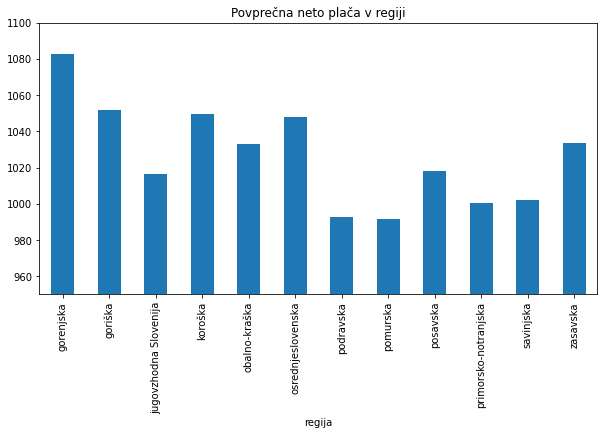

In [219]:
avg_place.plot.bar(ylim=(950, 1100), figsize=(10,5), title='Povprečna neto plača v regiji')

Poglejmo si tudi stanje s prihodki podjetji v občinah in regijah. Pri tem je morda smiselno za primerjavo uporabiti neto dohodek podjetja na delovno aktivnega prebivalca v posamezni občini in celovkupen neto dohodek podjetja na posamezega prebivalca v regiji. 

In [220]:
obcine['podjetje_na_zaposlenega'] = round(obcine.podjetja / ((obcine.delovna_aktivnost / 100) * obcine.prebivalci), 2)
podjetni = obcine[['ime_obcine', 'regija', 'prebivalci', 'delovna_aktivnost', 'placa', 'podjetje_na_zaposlenega']].sort_values('podjetje_na_zaposlenega', ascending=False)
podjetni

,ime_obcine,regija,prebivalci,delovna_aktivnost,placa,podjetje_na_zaposlenega
id,,,,,,
187,Trzin,osrednjeslovenska,3923,71.2,1123.40,382538.37
82,Ljubljana,osrednjeslovenska,294113,66.0,1281.66,234419.79
111,Nazarje,savinjska,2608,66.9,1072.53,233853.29
114,Odranci,pomurska,1644,67.0,961.71,213546.32
67,Komenda,osrednjeslovenska,6345,71.7,1193.57,202342.96
...,...,...,...,...,...,...
181,Tabor,savinjska,1659,70.4,866.34,6925.04
207,Žetale,podravska,1297,65.6,1029.91,6693.45
165,Šalovci,pomurska,1383,54.4,996.00,5203.68


<AxesSubplot:title={'center':'Povprečni neto prihodek podjetji na osebo'}, xlabel='regija'>

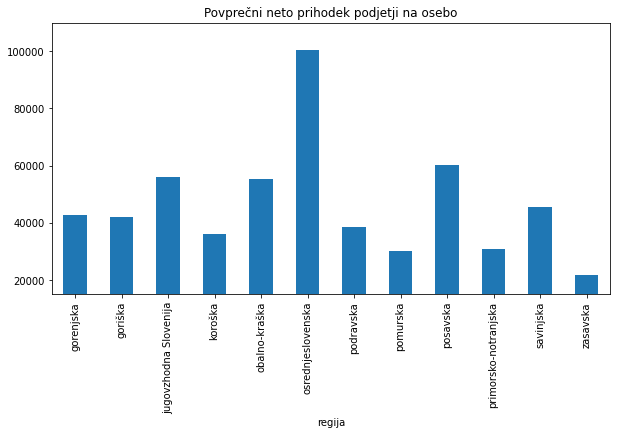

In [236]:
sum_podjetja = obcine.groupby('regija').sum()[['podjetja']].sort_values('regija')
each_podjetja = (sum_podjetja.podjetja / regije.prebivalci).round(decimals=2)
each_podjetja.plot.bar(ylim=(15000, 110000),figsize=(10,5), title='Povprečni neto prihodek podjetji na osebo')

V grobem raziščimo morebitno korelacijo med višino plače in naravnim prirastom lokalnega prebivalstva.

<AxesSubplot:xlabel='prirast', ylabel='placa'>

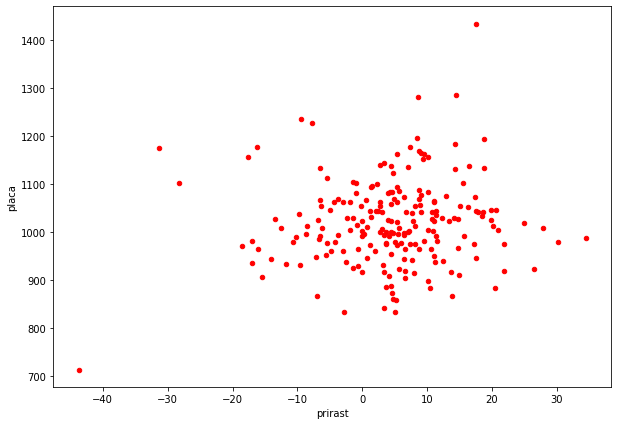

In [237]:
obcine[['prirast', 'placa']].plot.scatter('prirast', 'placa', figsize=(10,7), color='red')

In [238]:
#milijarderji_z_lokacijo=pd.merge(milijarderji, drzave, on='drzava')
#regije_z_mocnimi_obcinami

#### **Lastnosti voznega parka**

Ştarost vozila v lasti je lahko še en dober pokazatelj oziroma način vpogleda v fiančno stanje družbe.

Poglejmo, kako se le-te gibljejo po državi.

<AxesSubplot:title={'center':'Povprečna starost osebnega avtomobila'}, ylabel='regija'>

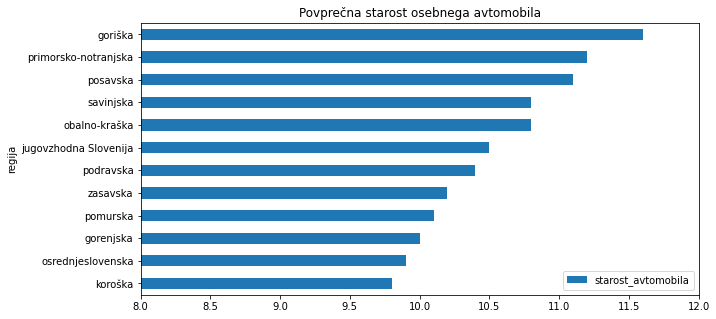

In [247]:
starosti = round(obcine.groupby('regija').mean()[['starost_avtomobila']], 1).sort_values('starost_avtomobila')
starosti.plot.barh(xlim=(8, 12), figsize=(10,5), title='Povprečna starost osebnega avtomobila')

### **Izsledki**

### **Zaključek**